# Traffic Signs Detection

## Download Dataset From Kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pkdarabi/cardetection")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cardetection' dataset.
Path to dataset files: /kaggle/input/cardetection


# 🔹 Step 1: Import Libraries & Prepare Dataset Path

Before preprocessing, we need to import required libraries and set up dataset paths. Run this first:

👉 Run this, and check if it prints your dataset path correctly.

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Path to dataset (downloaded via kagglehub)
dataset_path = path  # already set in your code

print("Dataset available at:", dataset_path)


Dataset available at: /kaggle/input/cardetection


#🔹 Step 2: Explore Dataset Structure

Before preprocessing, let’s see what’s inside the dataset folder (classes, images, etc.).

 👉 This will show whether your dataset is arranged in class folders (e.g., /Stop/, /SpeedLimit/, etc.) or if it has a different format.

In [ ]:
# Check folder structure
for root, dirs, files in os.walk(dataset_path):
    print("Root:", root)
    print("Dirs:", dirs[:5])   # show first 5 folders (classes)
    print("Files:", files[:5]) # show first 5 files
    break  # only check top-level


Root: /kaggle/input/cardetection
Dirs: ['car']
Files: ['video.mp4']


# 🔹 Step 3: Inspect Inside the car/ Folder
👉 Run this — it should print how many traffic sign categories exist and show a few class names.

In [ ]:
car_path = os.path.join(dataset_path, "car")

# List class folders inside "car"
class_dirs = os.listdir(car_path)
print("Number of classes:", len(class_dirs))
print("Example classes:", class_dirs[:10])


Number of classes: 6
Example classes: ['README.dataset.txt', 'README.roboflow.txt', 'data.yaml', 'valid', 'test', 'train']


YOLO-style structure with train/, valid/, and test/ folders, plus a data.yaml file.
Inside each of these (train, valid, test), you’ll have two subfolders:

images/ → contains pictures

labels/ → contains YOLO-format text files with bounding box annotations

⚠️ This dataset is for object detection (car detection), not direct classification.
But since you want traffic sign classification with Transfer Learning, we’ll slightly adjust our preprocessing:

Ignore YOLO labels (bounding boxes) for now.

Use the images from train/, valid/, and test/ folders.

For classification, we’ll need to group them by class (sign type).

# 🔹 Step 4: Load Images for Classification
👉 Run this to see how many images we have and confirm the filenames.

In [ ]:
train_path = os.path.join(car_path, "train", "images")
valid_path = os.path.join(car_path, "valid", "images")
test_path  = os.path.join(car_path, "test", "images")

print("Train images:", len(os.listdir(train_path)))
print("Valid images:", len(os.listdir(valid_path)))
print("Test images:", len(os.listdir(test_path)))

# Show a few sample image names
print("Sample train files:", os.listdir(train_path)[:5])


Train images: 3530
Valid images: 801
Test images: 638
Sample train files: ['00004_00034_00011_png.rf.2828d9b90a08f69f20d4fe5a94955d6c.jpg', 'road606_png.rf.4cfc55183329cd1d9c7a9edbf038c76f.jpg', '00004_00059_00019_png.rf.6bd94ce764502426dead721f2ee4e40f.jpg', 'road875_png.rf.71bbad8e5a7500b8a0d189e54346149a.jpg', '123e596f-82d1-4baa-a6b8-65b6e2bcf736_jpg.rf.24e8dcde03f21681357f459518e1e6e6.jpg']


Your dataset is YOLO object detection format, with 15 traffic sign classes (Stop, Speed Limits, Red/Green light, etc.).

#🔹 Step 5: Confirm Framework

-> Since your dataset is already YOLO-ready, the cleanest way is:

-> Use Ultralytics YOLOv8 (easy, transfer learning included)

-> Train directly on data.yaml

-> Use pretrained YOLOv8 small model (yolov8s.pt)

-> Fine-tune on your 15 traffic sign classes

-> Train using your train/valid/test split

In [ ]:
!pip install ultralytics

from ultralytics import YOLO

# Load pretrained YOLOv8 model (transfer learning)
model = YOLO("yolov8s.pt")  # you can also try yolov8m.pt or yolov8n.pt

# Train on your dataset
model.train(data=os.path.join(car_path, "data.yaml"), epochs=50, imgsz=640)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/cardetection/car/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=Non

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79dd08026e40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.0

# 🔹 YOLO Evaluation Metrics
Example:::
          YOLO will automatically report:

mAP50 → mean Average Precision at IoU=0.5

mAP50-95 → mean AP averaged over IoU thresholds (0.5 to 0.95, COCO standard)

Precision → fraction of predicted boxes that are correct

Recall → fraction of ground-truth boxes detected

In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")  # load best model
metrics = model.val()
print(metrics)   # prints precision, recall, mAP


Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.1±0.1 ms, read: 38.2±16.3 MB/s, size: 16.0 KB)
val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 801/801 329.0it/s 2.4s
WARNING ⚠️ val: Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 51/51 4.0it/s 12.7s
                   all        801        944      0.954      0.938       0.97      0.848
           Green Light         87        122      0.842      0.762      0.881      0.546
             Red Light         74        108      0.847      0.759      0.823      0.527
       Speed Limit 100         52         52      0.928          1      0.988      0.911
       Speed Limit 110    

# Load the model

In [2]:
!pip install ultralytics
from ultralytics import YOLO

# Load trained model
model = YOLO("/content/drive/MyDrive/deep learning/runs/detect/train/weights/best.pt")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# 🔹 Step 1: Upload Image

In [8]:
from google.colab import files

# Upload image
uploaded = files.upload()


Saving markus-winkler-EbqlnKG6iEw-unsplash.jpg to markus-winkler-EbqlnKG6iEw-unsplash.jpg


# 🔹 Step 2: Run Prediction on Uploaded Image

In [10]:
import os

# Get the uploaded file name
image_path = list(uploaded.keys())[0]

# Run YOLO prediction
results = model.predict(source=image_path, conf=0.25, save=True)

# Show prediction
from IPython.display import Image as IPImage
pred_path = results[0].save_dir / os.path.basename(image_path)  # saved result
IPImage(filename=pred_path)



image 1/1 /content/markus-winkler-EbqlnKG6iEw-unsplash.jpg: 448x640 1 Speed Limit 30, 49.2ms
Speed: 3.2ms preprocess, 49.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict2


TypeError: unsupported operand type(s) for /: 'str' and 'str'

# 🔹 Step 3: Print Predicted Classes & Confidence Scores

In [12]:
for r in results:
    for box in r.boxes:
        cls_id = int(box.cls[0])  # class id
        conf = float(box.conf[0]) # confidence
        label = model.names[cls_id]
        print(f"{label}: {conf:.2f}")


Speed Limit 30: 0.94


# 🔹 SHOW IMAGE

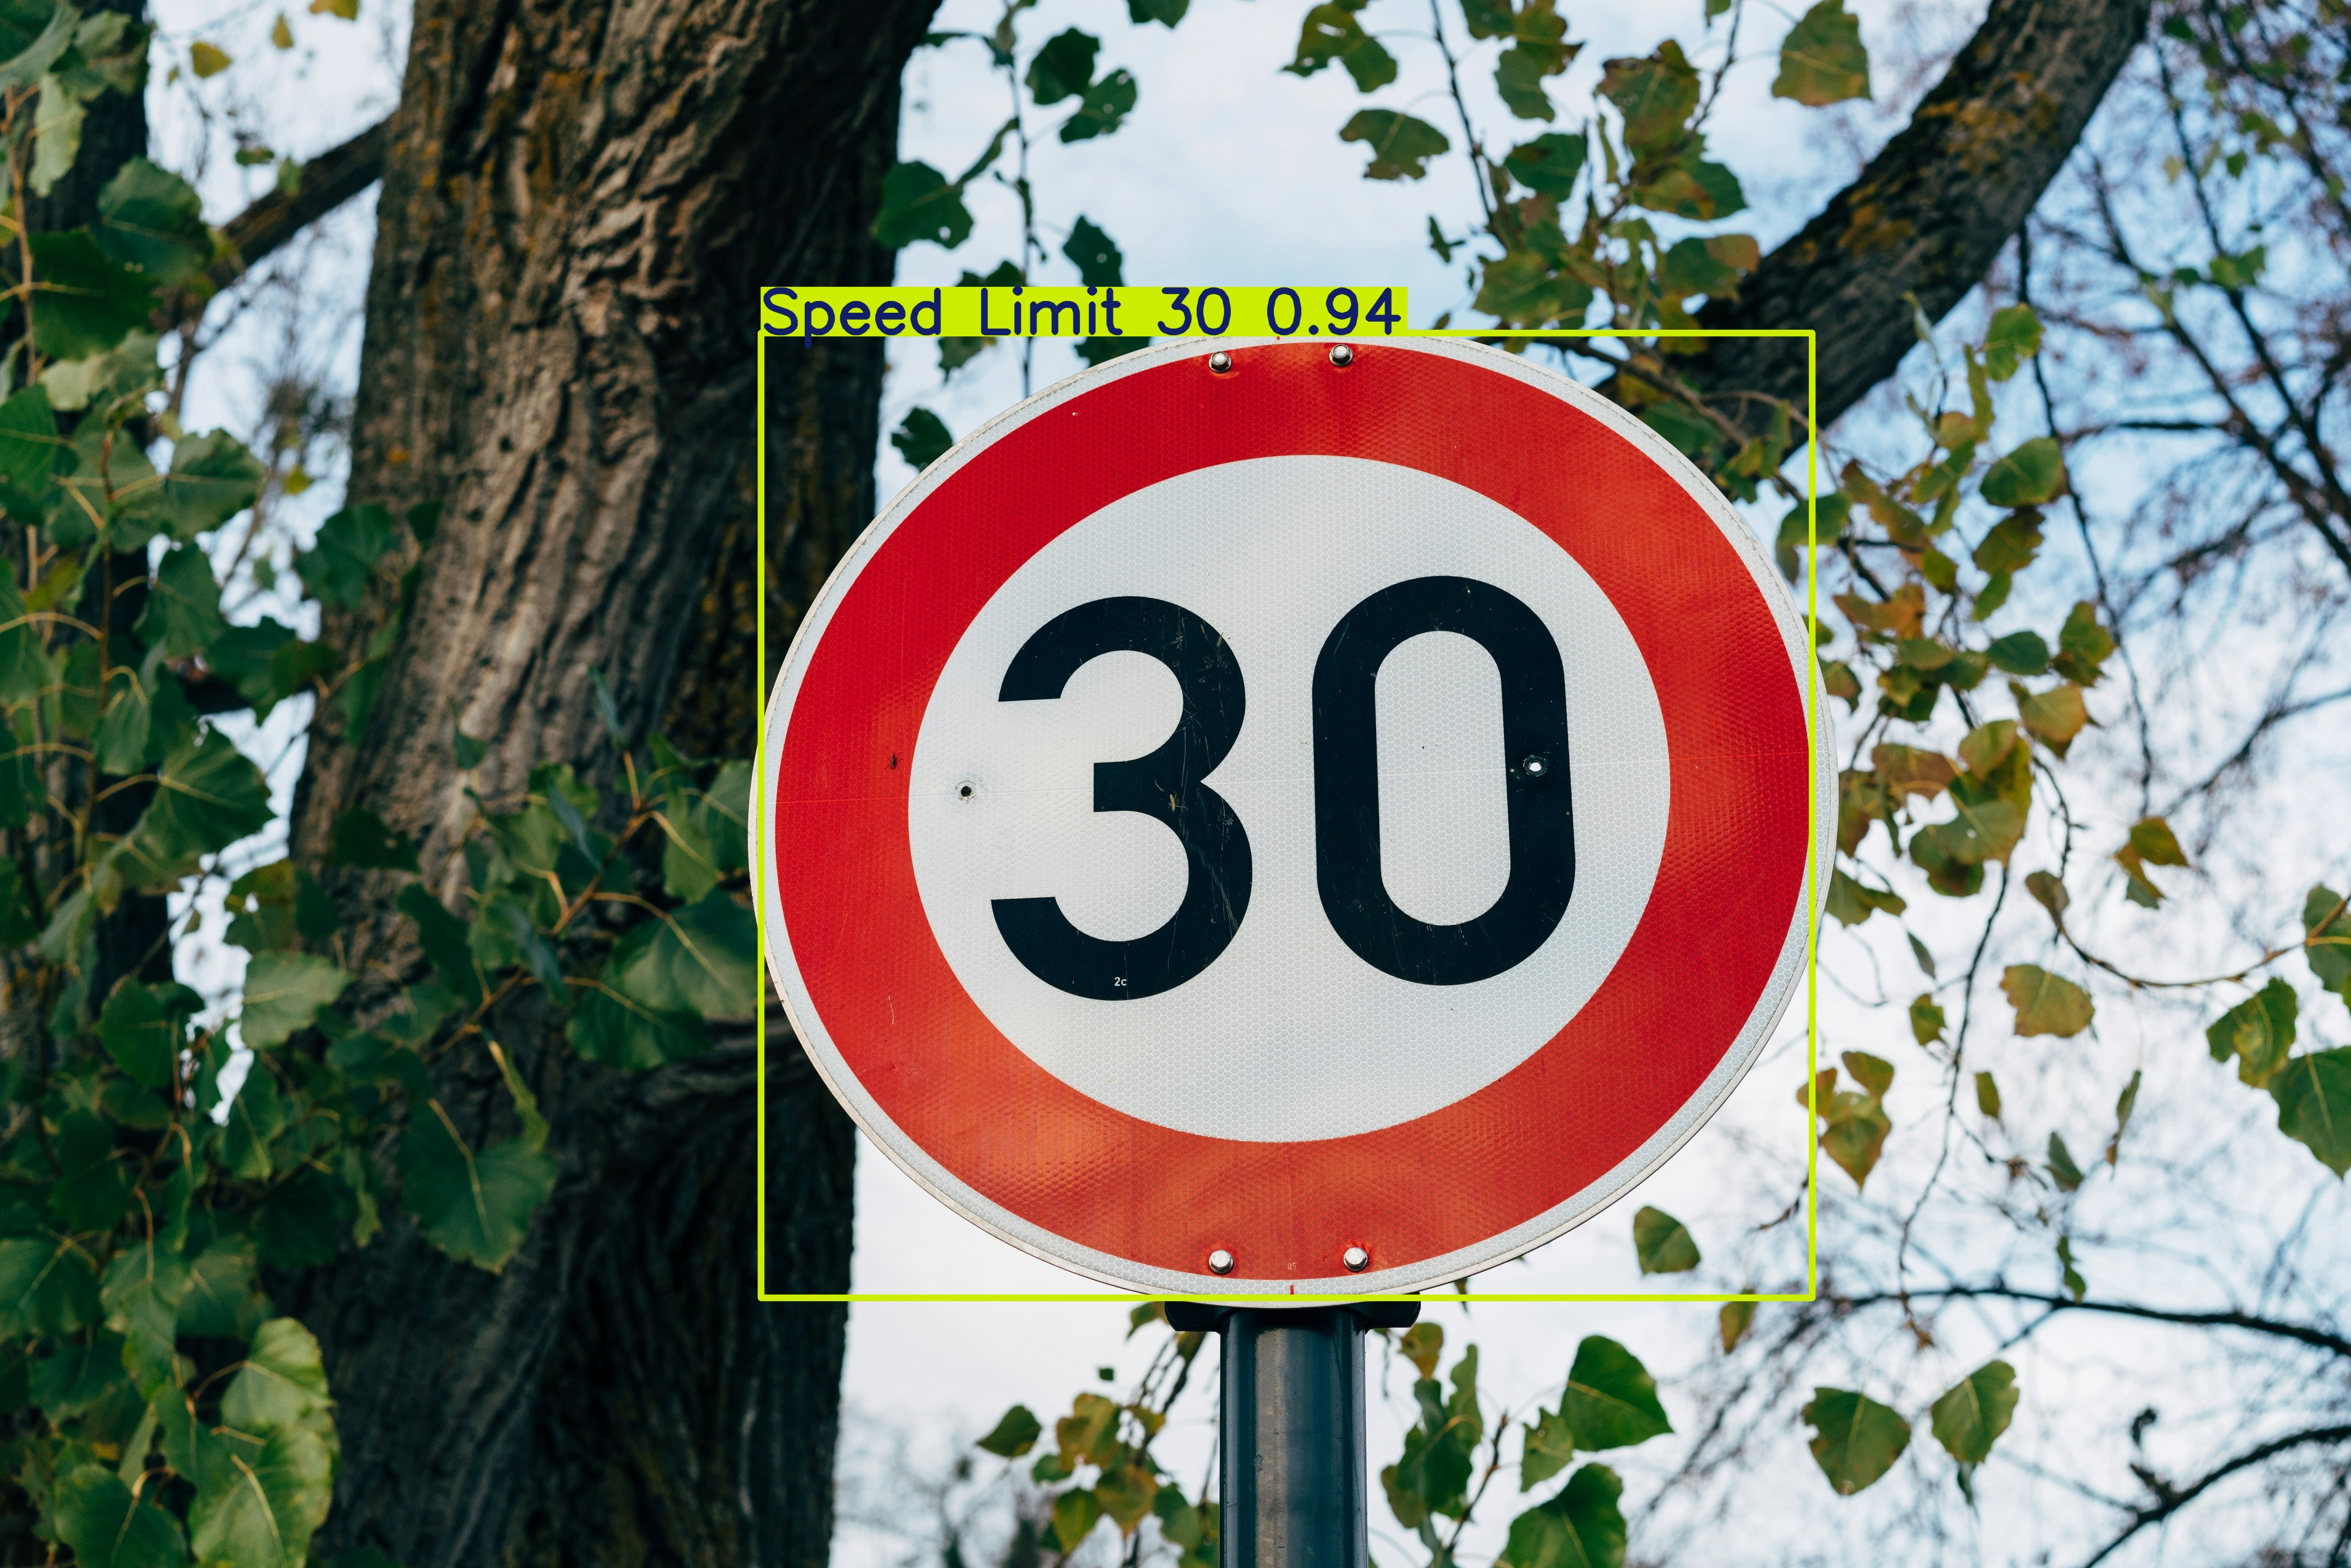

In [11]:
from IPython.display import Image as IPImage
import os

# Join string paths correctly
pred_path = os.path.join(results[0].save_dir, os.path.basename(image_path))

# Show the prediction
IPImage(filename=pred_path)


# 🔹 Save The Model

In [ ]:
# Save best model explicitly
model.save("best_model.pt")


# 🔹 script for video prediction:

In [7]:
from ultralytics import YOLO
from google.colab import files
import os

# ------------------------------
# 1. Upload Video
# ------------------------------
uploaded = files.upload()   # upload your mp4 file
video_path = list(uploaded.keys())[0]

print(f"✅ Uploaded video: {video_path}")

# ------------------------------
# 2. Load YOLO Model
# ------------------------------
model = YOLO("/content/drive/MyDrive/deep learning/runs/detect/train/weights/best.pt")   # replace with your trained weights

# ------------------------------
# 3. Run Predictions on Video
# ------------------------------
results = model.predict(
    source=video_path,   # input video
    conf=0.25,           # confidence threshold
    save=True            # save output video
)

print("✅ Processed video saved in:", results[0].save_dir)

# ------------------------------
# 4. Download Result Video
# ------------------------------
import shutil
output_folder = results[0].save_dir
for file in os.listdir(output_folder):
    if file.endswith(".mp4"):
        output_video = os.path.join(output_folder, file)
        shutil.copy(output_video, "predicted_video.mp4")

files.download("predicted_video.mp4")


Saving video.mp4 to video.mp4
✅ Uploaded video: video.mp4

WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/508) /content/video.mp4: 640x640 1 Stop, 16.2ms
video 1/1 (frame 2/508) /content/video.mp4: 640x640 1 Stop, 16.3ms
video 1/1 (frame 3/508) /content/video.mp4: 640x640 1 Stop, 16.2ms
video 1/1 (frame 4/508) /content/video.mp4: 640x640 1 Speed Limit 10, 16.3ms
video 1/1 (frame 5/508) /content/video.mp4: 640x640 1 Stop, 16.3ms
video 1/1 (frame 6/508) /content/video.mp4: 640x640 1

FileNotFoundError: Cannot find file: predicted_video.mp4